In [1]:
import os
import glob
import matplotlib.pyplot as plt

import pickle
import pandas as pd

# 01. Import pickle file with timeseries datasets

In [2]:
pickle_file_path = "../../data/ts_dict.pickle"

with open(pickle_file_path, 'rb') as file:
    ts_dict = pickle.load(file)


In [3]:
ts_dict.keys()

dict_keys(['main', 'jb001_flow_data', 'jb001_water_level', 'jb002_flow_data', 'jb002_water_level', 'jb009_flow_data', 'jb009_level_data', 'snrfa_flow_data', 'snrfa_level_data'])

In [4]:
ts_dict["main"]

,Unnamed: 0,Station Number,Station Name,River,Status,First Date,Last Update,Level,Moderate Flood Risk,High Flood Risk,Bank Full,Maximum Depth,Maximum Width,Maximum Flow,Elevation,Latitude,Longitude
0,NaN,JB001,Luuq,Juba,Functional,"Jan. 1, 1951","Dec. 22, 2023",2.06m,5.5m,6.0m,7.0m,9.0m,140.0m,1800.0m,140.0,42.542640,3.79172
1,NaN,JB002,Bardheere,Juba,Functional,"Jan. 1, 1963","Dec. 22, 2023",0.0m,7.4m,8.2m,10.4m,8.0m,100.0m,1800.0m,87.0,42.281150,2.33989
2,NaN,JB009,Dollow,Juba,Functional,"Jan. 1, 2015","Dec. 22, 2023",2.44m,4.5m,5.0m,6.0m,-,-,-,177.0,42.079382,4.18777
3,NaN,JB010,Bualle,Juba,Functional,"Jan. 1, 2008","Dec. 22, 2023",6.8m,9.0m,10.0m,12.0m,-,-,-,51.0,42.573170,1.24477
4,NaN,SH001,Belet Weyne,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",6.3m,6.5m,7.3m,8.3m,7.0m,44.0m,500.0m,182.0,45.205960,4.73598
5,NaN,SH002,Bulo Burti,Shabelle,Functional,"Jan. 1, 1963","Dec. 22, 2023",8.0m,6.5m,7.2m,8.0m,8.0m,42.0m,-,133.0,45.567270,3.85702
6,NaN,SH004,Jowhar,Shabelle,Functional,"Jan. 1, 1999","Dec. 22, 2023",4.9m,5.0m,5.25m,5.5m,5.5m,33.0m,-,105.0,45.504860,2.77872
7,NaN,SH003,Mahadey Weyne,Shabelle,Non Functional,"Jan. 1, 1963","Dec. 31, 1990",-,-,-,-,-,32.0m,-,115.0,45.530380,2.97098


In [5]:
for idx in ts_dict.keys():
    if idx != "main":
        ts_dict[idx]["date"] = pd.to_datetime(ts_dict[idx]["date"], format='%Y-%m-%d')
        ts_dict[idx].set_index('date', inplace=True)



<Axes: xlabel='date'>

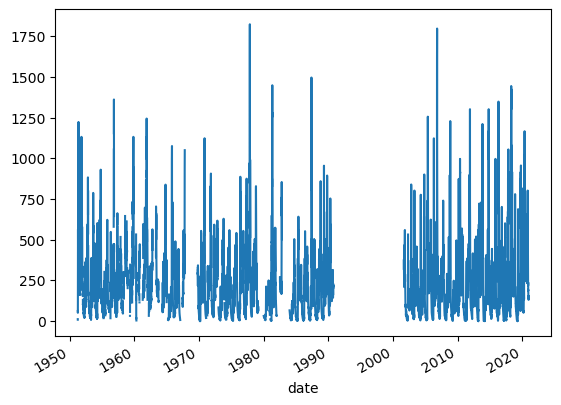

In [6]:
ts_dict["jb001_flow_data"]["flow(m3/s)"].plot()

In [7]:
ts_dict.keys()

dict_keys(['main', 'jb001_flow_data', 'jb001_water_level', 'jb002_flow_data', 'jb002_water_level', 'jb009_flow_data', 'jb009_level_data', 'snrfa_flow_data', 'snrfa_level_data'])

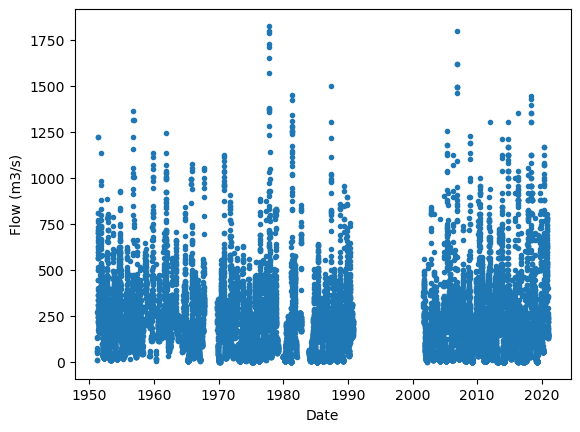

In [8]:
plt.scatter(ts_dict["jb001_flow_data"].index, ts_dict["jb001_flow_data"]["flow(m3/s)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Flow (m3/s)")
plt.show()

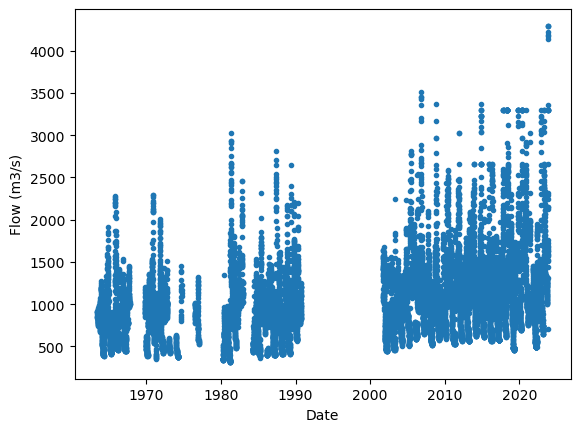

In [9]:
plt.scatter(ts_dict["jb002_flow_data"].index, ts_dict["jb002_flow_data"]["flow(m3/s)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Flow (m3/s)")
plt.show()

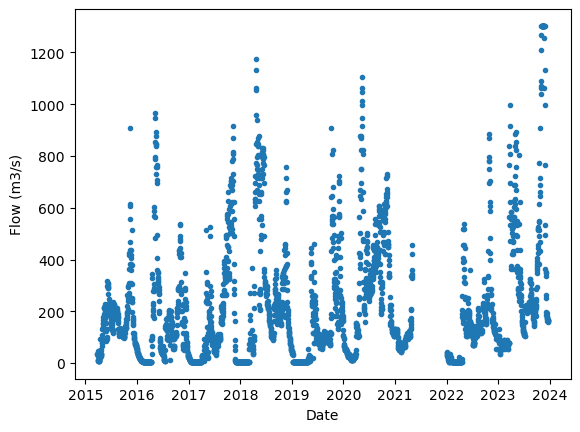

In [10]:
plt.scatter(ts_dict["jb009_flow_data"].index, ts_dict["jb009_flow_data"]["flow(m3/s)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Flow (m3/s)")
plt.show()


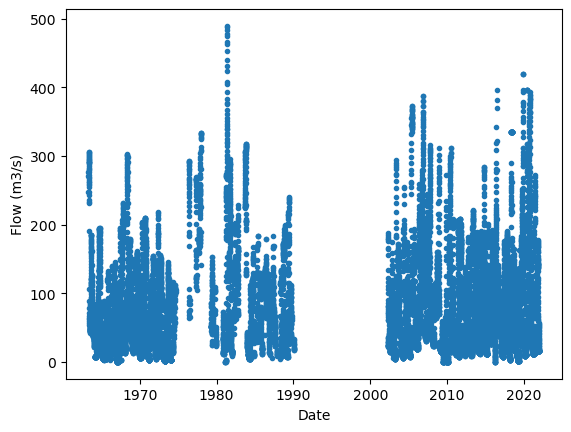

In [11]:
plt.scatter(ts_dict["snrfa_flow_data"].index, ts_dict["snrfa_flow_data"]["flow(m3/s)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Flow (m3/s)")
plt.show()

# Explore water level data

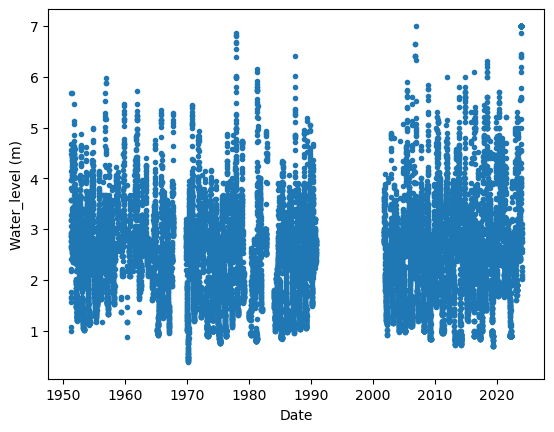

In [12]:
plt.scatter(ts_dict["jb001_water_level"].index, ts_dict["jb001_water_level"]["level(m)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Water_level (m)")
plt.show()

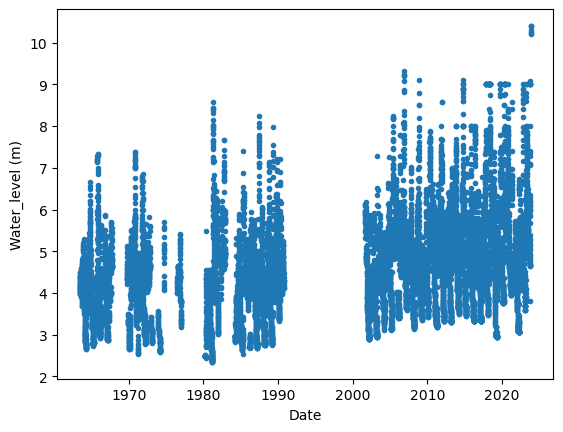

In [13]:
plt.scatter(ts_dict["jb002_water_level"].index, ts_dict["jb002_water_level"]["level(m)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Water_level (m)")
plt.show()

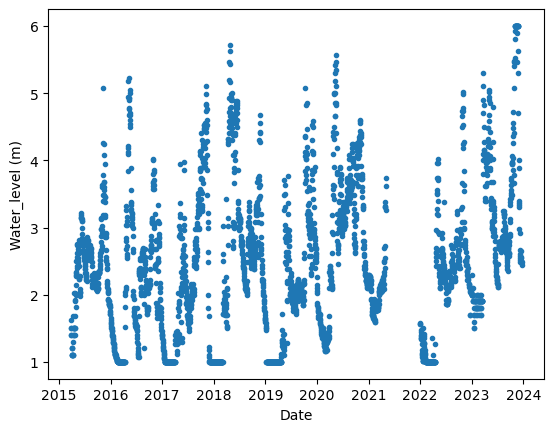

In [14]:
plt.scatter(ts_dict["jb009_level_data"].index, ts_dict["jb009_level_data"]["level(m)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Water_level (m)")
plt.show()

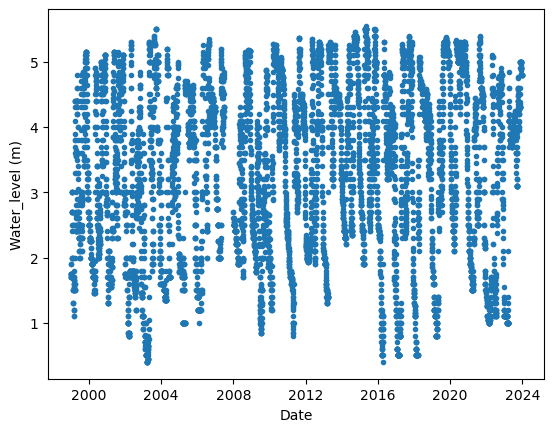

In [15]:
plt.scatter(ts_dict["snrfa_level_data"].index, ts_dict["snrfa_level_data"]["level(m)"], marker='.')
plt.xlabel("Date")
plt.ylabel("Water_level (m)")
plt.show()

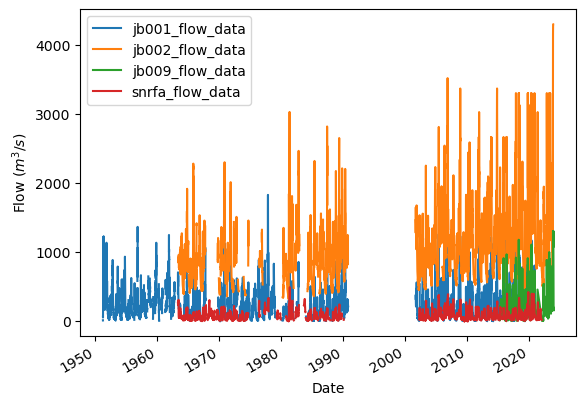

In [24]:
flow_list = ['jb001_flow_data', 'jb002_flow_data', 'jb009_flow_data', 'snrfa_flow_data']
level_list = ['jb001_water_level', 'jb002_water_level', 'jb009_level_data', 'snrfa_level_data']
for idx in ts_dict.keys():
    if idx in flow_list:
        ts_dict[idx]["flow(m3/s)"].plot(label=idx)

plt.xlabel("Date")
plt.ylabel("Flow ($m^3/s$)")
plt.legend()
plt.show()


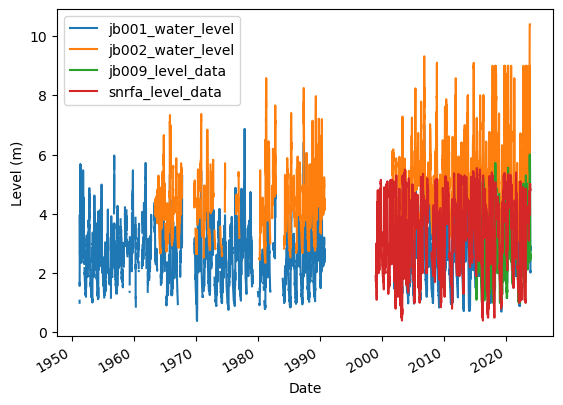

In [26]:
flow_list = ['jb001_flow_data', 'jb002_flow_data', 'jb009_flow_data', 'snrfa_flow_data']
level_list = ['jb001_water_level', 'jb002_water_level', 'jb009_level_data', 'snrfa_level_data']
for idx in ts_dict.keys():
    if idx in level_list:
        ts_dict[idx]["level(m)"].plot(label=idx)

plt.xlabel("Date")
plt.ylabel("Level (m)")
plt.legend()
plt.show()

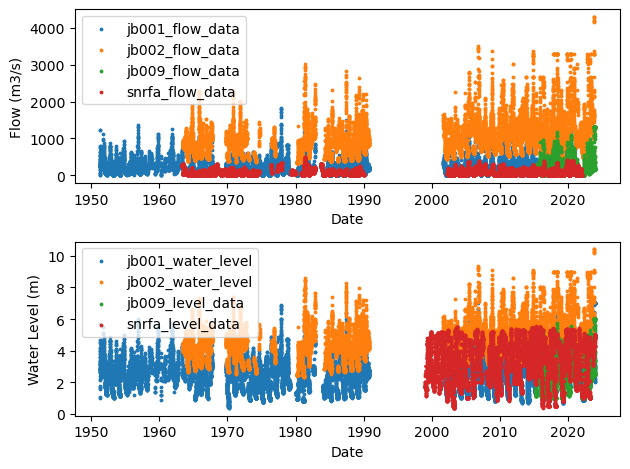

In [42]:
marker_size = 3

fig, axes = plt.subplots(2, 1)

# Plot flow data
axes[0].scatter(ts_dict["jb001_flow_data"].index, ts_dict["jb001_flow_data"]["flow(m3/s)"], label="jb001_flow_data", s = marker_size)
axes[0].scatter(ts_dict["jb002_flow_data"].index, ts_dict["jb002_flow_data"]["flow(m3/s)"], label="jb002_flow_data", s = marker_size)
axes[0].scatter(ts_dict["jb009_flow_data"].index, ts_dict["jb009_flow_data"]["flow(m3/s)"], label="jb009_flow_data", s = marker_size)
axes[0].scatter(ts_dict["snrfa_flow_data"].index, ts_dict["snrfa_flow_data"]["flow(m3/s)"], label="snrfa_flow_data", s = marker_size)

axes[0].set_xlabel("Date")
axes[0].set_ylabel("Flow (m3/s)")
axes[0].legend()

# Plot water level data
axes[1].scatter(ts_dict["jb001_water_level"].index, ts_dict["jb001_water_level"]["level(m)"], label="jb001_water_level", s = marker_size)
axes[1].scatter(ts_dict["jb002_water_level"].index, ts_dict["jb002_water_level"]["level(m)"], label="jb002_water_level", s = marker_size)
axes[1].scatter(ts_dict["jb009_level_data"].index, ts_dict["jb009_level_data"]["level(m)"], label="jb009_level_data", s = marker_size)
axes[1].scatter(ts_dict["snrfa_level_data"].index, ts_dict["snrfa_level_data"]["level(m)"], label="snrfa_level_data", s = marker_size)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Water Level (m)")
axes[1].legend()

plt.tight_layout()
plt.show()